In [1]:
pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 5.7 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn import metrics
from sklearn.metrics import classification_report
import seaborn as sns 
import matplotlib.pyplot as plt

In [3]:
# Reading the dataset
df = pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.shape

(284807, 31)

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


**Missing values in variables**

In [6]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

We can see that there are no missing values in the dataset.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

**Explore class variable**

In [8]:
fraud = df[df['Class'] == 1]
safe = df[df['Class'] == 0]
print('The number of fraud transactions are {}'.format(fraud.shape[0]))
print('The number of safe transactions are {}'.format(safe.shape[0]))

The number of fraud transactions are 492
The number of safe transactions are 284315


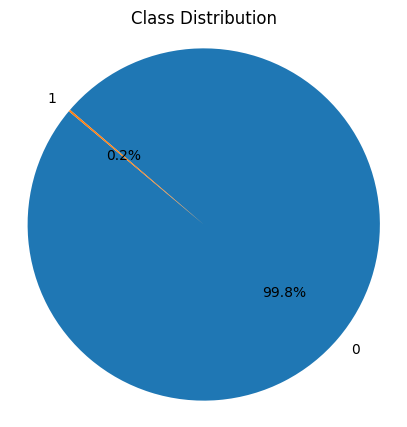

In [9]:
labels = df['Class'].value_counts().index
sizes = df['Class'].value_counts().values

plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal') 
plt.title('Class Distribution')
plt.show()


**Search for any correlations**

Text(0.5, 1.0, 'Correlation Matrix')

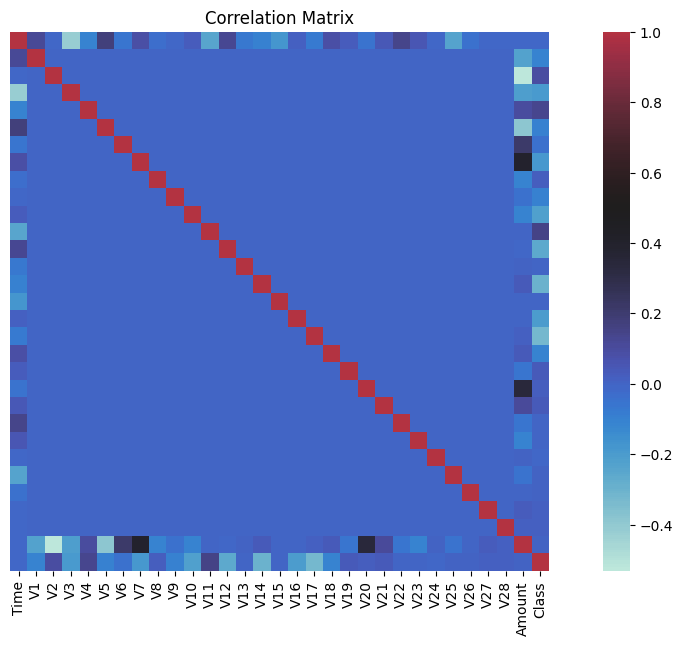

In [10]:
fig,ax=plt.subplots(1,1,figsize=(14,7))
sns.heatmap(df.corr(), square=True, center=0.5, yticklabels=False).set_title('Correlation Matrix')

No highly dependent or independent for target variable

**The objective is to find out why balancing is necessary in an unbalanced dataset.**

# Let's not balance and see the results.

First let's scale Time and Amount to get better results

In [11]:
rs = RobustScaler()
df['scaled_amount'] = rs.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rs.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time', 'Amount'], axis=1, inplace=True)
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']
df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(0, 'scaled_time', scaled_time)
df.head()

,scaled_time,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-0.994983,1.783274,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.994983,-0.269825,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-0.994972,4.983721,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-0.994972,1.418291,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-0.994960,0.670579,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


first we split data into separate training and test set

In [12]:
inputs = df.drop("Class", axis="columns")
targets = df.Class
x_train, x_test, y_train, y_test = train_test_split( inputs, targets, test_size=0.2, random_state=10)

In [13]:
print("y test value counts:\n" ,y_test.value_counts(),"\n\n")
print("y train value counts:\n" ,y_train.value_counts())

y test value counts:
 Class
0    56868
1       94
Name: count, dtype: int64 


y train value counts:
 Class
0    227447
1       398
Name: count, dtype: int64


then we fit the Logistic Regression model

In [14]:
lg=LogisticRegression(max_iter = 10000)
lg.fit(x_train,y_train)
y_predicted = lg.predict(x_test)
accuracy = lg.score(x_test, y_test)

print(classification_report(y_test,y_predicted))
print(accuracy)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56868
           1       0.88      0.67      0.76        94

    accuracy                           1.00     56962
   macro avg       0.94      0.84      0.88     56962
weighted avg       1.00      1.00      1.00     56962

0.9992977774656788


We got 99.9% accuracy without doing any balancing. Why is it then necessary to balance ? That will be answered by a confusion matrix.

## confusion matrix

The Confusion Matrix is a table used to describe the performance of a classification model's true values on test data. It contains 4 different combinations of estimated and actual values.

Terminology and derivations from a confusion matrix:

* true positive (TP): The predicted value by the model matches the actual value (The actual value was positive, and the machine learning model predicted a positive value)

* true negative (TN): The predicted value by the model matches the actual value (The actual value was negative, and the machine learning model predicted a negative value)
* false positive (FP): The machine learning model made a false prediction (The actual value was negative, but the machine learning model predicted a positive value)
* false negative (FN): The machine learning model made a false prediction (The actual value was positive, but the machine learning model predicted a negative value)

|                      | Predicted Positive |  Predicted Negative |
|:--------------------:|:------------------:|:------------------:|
|    Actual Positive   |   True Positive    |  False Negative    |
|    Actual Negative   |   False Positive   |   True Negative    |

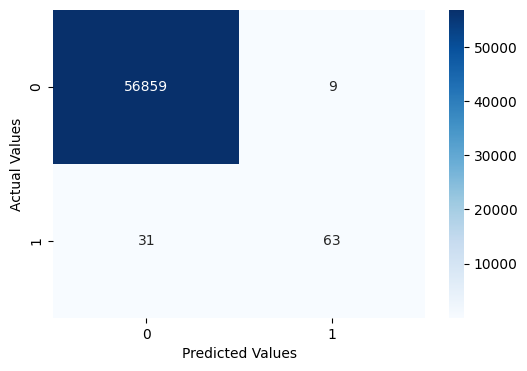

In [15]:
confusion_matrix = metrics.confusion_matrix(y_test, y_predicted)

plt.figure(figsize=(6, 4))  
sns.heatmap(confusion_matrix, annot=True, cmap='Blues' ,fmt='d')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.show()

We see that 32 of fraud transactions (out of 94) have been classified as legit (False Negative). But only 11 of legit transactions (out of 56868) have been classified as fraud(False positive). Or in other words,only 62 fraud transactions(out of 94, which makes it 65.9%) were accurately classified as fraud. But 56839 legit transactions (out of 56868, which makes it 99.95%) were accurately classified as legit.
Which means that our model is doing well to predict the legit transactions but not so well to predict the fraud transactions. Which means that 99.9% accuracy is pretty much the accuracy to predict legit transactions, not fraud. But that's not what we are trying to achieve.

# How to handle imbalanced datasets

One of the mainly used methodes is the Resampling which is to make the data set more balanced by adding new samples to the minority class or removing samples from the majority class.
There are different techniques for this:
Balancing with Undersampling
* Random Undersampling
* Random Oversampling
* SMOTE (Synthetic Minority Over-sampling Technique)
* ADASYN (Adaptive Synthetic Sampling)

## 1. Random Undersampling

We intend to address the data imbalance issue by performing undersampling specifically on the legitimate transactions within our training dataset. It's important to note that we won't apply the balancing technique to the test data. We have chosen to retain the imbalance in the test set to ensure that the model's evaluation aligns with its real-world application, where imbalanced data is prevalent.

To execute this approach, we will first recreate the training data from x_train and y_train to separate legit and fraud transactions.

In [16]:
train_data = pd.concat([x_train, y_train], axis=1)
train_data.head()

,scaled_time,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
245582,0.800327,0.041780,-3.678592,-2.185288,2.145642,-0.108133,5.326785,-3.320732,-4.715889,-0.676015,...,-1.528738,0.281099,-1.687634,-5.947433,0.991956,-0.871129,-0.674865,0.526634,0.318034,0
33921,-0.555129,-0.296793,1.289134,0.467212,-1.035215,0.348510,0.965128,0.162317,0.188477,0.053558,...,-0.051953,-0.147832,-0.362923,-0.230544,-1.427948,0.650917,0.465196,-0.022903,0.009328,0
18808,-0.645073,1.439251,0.824080,-1.197571,1.671425,0.999394,-1.540596,1.480644,-1.451232,0.713797,...,0.017694,0.162967,0.668738,-0.229503,-0.232408,0.256959,0.741650,0.042034,0.029245,0
52806,-0.458640,-0.028226,-0.763642,1.153200,0.845734,-0.287226,-0.005743,-0.137666,0.255488,0.578325,...,0.036340,-0.183093,-0.678964,-0.037631,-0.529925,-0.096189,0.108287,0.126774,0.039826,0
200909,0.575030,-0.167819,1.986009,-0.337558,-0.418934,0.369815,-0.360600,-0.012716,-0.588175,-0.005277,...,-0.113618,0.199920,0.863473,0.130956,0.660961,-0.034146,-0.240472,0.047897,-0.028392,0


In [17]:
legit_train = train_data[train_data.Class == 0]
fraud_train = train_data[train_data.Class == 1]

In [18]:
#Check how many frauds we got so that we can undersample legit transactions to that number.
print(legit_train.shape, fraud_train.shape)

(227447, 31) (398, 31)


So, we see that there are 227447 legit transactions and 398 fraud transactions in our training data set. We will balance this dataset by randomly selecting 398 legit transactions out of 227447. This is called random undersampling.

In [19]:
legit_train = legit_train.sample(n=398)
legit_train.shape

(398, 31)

In [20]:
#Now that we have same number of fraud and legit transactions, let's join them back to recreate a complete balanced training dataset.
train_data = pd.concat([legit_train, fraud_train], axis=0)
train_data.shape

(796, 31)

Let's separate features and targets from the new training dataset.



In [21]:
x_train_undersampled = train_data.drop('Class', axis='columns')
y_train_undersampled = train_data.Class

We don't have to bother with the test dataset because it will stay the same. So, we will just fit the model with new x_train_new, y_train_new and old x_test, y_test.

In [22]:
lg=LogisticRegression(max_iter = 10000)
lg.fit(x_train_undersampled,y_train_undersampled)
y_predicted = lg.predict(x_test)
accuracy = lg.score(x_test, y_test)

print(classification_report(y_test,y_predicted))
print(accuracy)

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     56868
           1       0.04      0.90      0.08        94

    accuracy                           0.97     56962
   macro avg       0.52      0.94      0.53     56962
weighted avg       1.00      0.97      0.98     56962

0.965696429198413


We got an accuracy of 96.13%. Not bad. Let's check the confusion matrix.



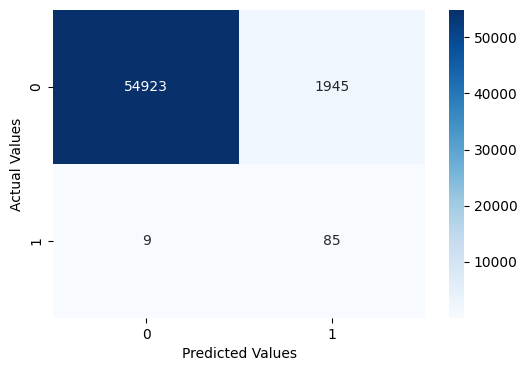

In [23]:
confusion_matrix = metrics.confusion_matrix(y_test, y_predicted)

plt.figure(figsize=(6, 4))  
sns.heatmap(confusion_matrix, annot=True, cmap='Blues' ,fmt='d')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.show()

From the confusion matrix, we see that 86 fraud transactions (out of 94, which makes it 91.4% ) were accurately classified as fraud. And 54675 legit transactions (out of 56868, which makes it 96.14%) were accurately classified as legit. Only 11 fraud transactions were classified as legit transactions. This result shows that even though we got less accuracy, this model is better at predicting the fraud transactions.

In the other hand Random Oversampling involves randomly selecting instances from the minority class and adding them to the training dataset until the class distribution is more balanced. and that's why we will randomly duplicate fraud transactions untill we get a balanced new dataset.



## 2. Random Upsampling


let's split the training dataset to legit and fraud datasets so we can upsample the fraud dataset 

In [24]:
train_data = pd.concat([x_train, y_train], axis=1)

In [25]:
legit_train = train_data[train_data.Class == 0]
fraud_train = train_data[train_data.Class == 1]

In [26]:
# before oversamling
print(legit_train.shape, fraud_train.shape)

(227447, 31) (398, 31)


To upsample the fraud training dataset we duplicate randomly this dataset and to do so we follow these steps: 
1. First we shuffle the fraud_train dataset to create a random order of rows.
2. Repeat this shuffled dataset to meet the desired number of rows.
3. If there's a remaining rows, slice the shuffled dataset to add the remaining rows.

In [27]:
# Shuffle the fraud_train dataset randomly
shuffled_fraud_train = fraud_train.sample(frac=1, random_state=42)

In [28]:
# Calculate the number of times to repeat the shuffled dataset and number of remaining rows
duplications_needed = len(legit_train) // len(fraud_train)
remaining_rows = len(legit_train) % len(fraud_train)

In [29]:
# Create a list of duplicated and shuffled DataFrames
duplicated_fraud_train = [shuffled_fraud_train] * duplications_needed
# If there's a remaining rows, we can slice the shuffled DataFrame to add the remaining rows
if remaining_rows > 0:
    duplicated_fraud_train.append(shuffled_fraud_train[:remaining_rows])

In [30]:
# Concatenate the list of duplicated DataFrames to create the final DataFrame 
upsampled_fraud_train = pd.concat(duplicated_fraud_train, ignore_index=True)

Now that we have our upsampled fraud dataset lets combine it with not fraud dataset




In [31]:
upsampled_train = pd.concat([legit_train, upsampled_fraud_train])

Class
0    227447
1    227447
Name: count, dtype: int64


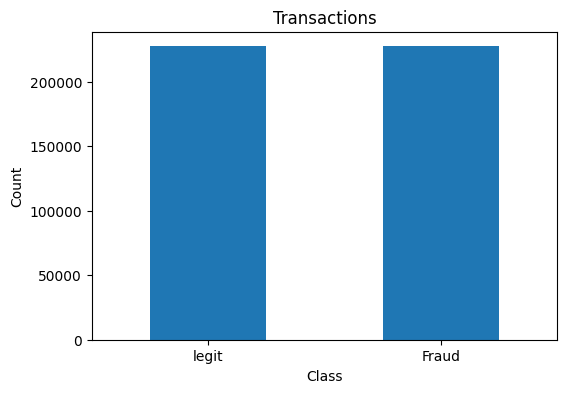

In [32]:
print(upsampled_train['Class'].value_counts())
plt.figure(figsize=(6, 4))

labels = ["legit", "Fraud"]
count_classes = upsampled_train.value_counts(upsampled_train['Class'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Transactions")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

we see now that we have a balanced dataset

In [33]:
x_train_ov = upsampled_train.drop("Class", axis="columns")
y_train_ov = upsampled_train.Class

In [34]:
lorg = LogisticRegression(max_iter = 10000)
lorg.fit(x_train_ov , y_train_ov)
y_pred_upsampled_model = lorg.predict(x_test)

print("accuracy = ",lorg.score(x_test , y_test))
print(classification_report(y_test,y_pred_upsampled_model))

accuracy =  0.9752291001018223
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56868
           1       0.06      0.89      0.11        94

    accuracy                           0.98     56962
   macro avg       0.53      0.93      0.55     56962
weighted avg       1.00      0.98      0.99     56962



we see that we got a very good accuracy but a litle bit increase of precision and recall compared to the random undersampling



now let's see the confusion matrix

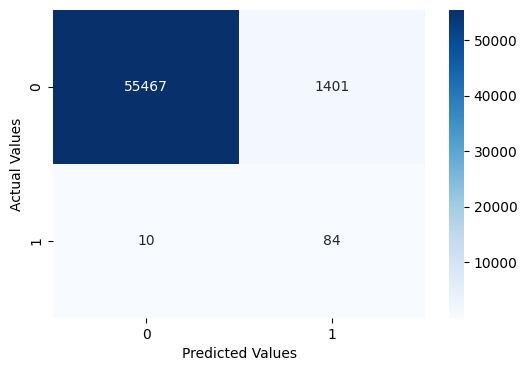

In [35]:
nn_cnf_matrix = metrics.confusion_matrix(y_test, y_pred_upsampled_model)

plt.figure(figsize=(6, 4))  
sns.heatmap(nn_cnf_matrix, annot=True, cmap='Blues' ,fmt='d')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.show()

oversampling's confusion matrix is relatively similar to undersampling's confusion matrix but a litle increase of the true positives and the true negatives increase the accuracy. To sum up random oversamling gives similar results as random undersampling but it increase accuracy (we got about 97.5%)



## 3. SMOTE (Synthetic Minority Over-sampling Technique)

In [36]:
pip install imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 4.9 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [37]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=31)
x_train_smote, y_train_smote = sm.fit_resample(x_train, y_train)

let's check if dataset is now balanced 

<Axes: xlabel='Class', ylabel='count'>

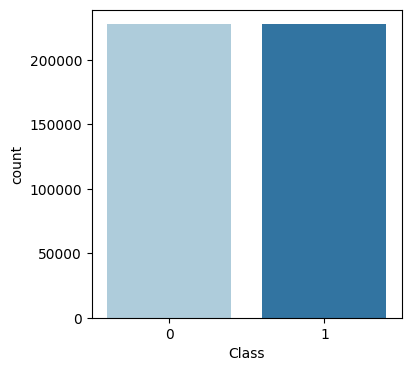

In [38]:
plt.figure(figsize=(4, 4))  
sns.countplot(x=y_train_smote,palette='Paired')

yes it is! 

Now let's fit the model and see its performance

In [39]:
lorg = LogisticRegression(max_iter = 10000)
lorg.fit(x_train_smote , y_train_smote)
y_pred_smote = lorg.predict(x_test)

print("accuracy = ",lorg.score(x_test , y_test))
print(classification_report(y_test,y_pred_smote))

accuracy =  0.974474210877427
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56868
           1       0.06      0.91      0.11        94

    accuracy                           0.97     56962
   macro avg       0.53      0.94      0.55     56962
weighted avg       1.00      0.97      0.99     56962



let's check the confusion matrix

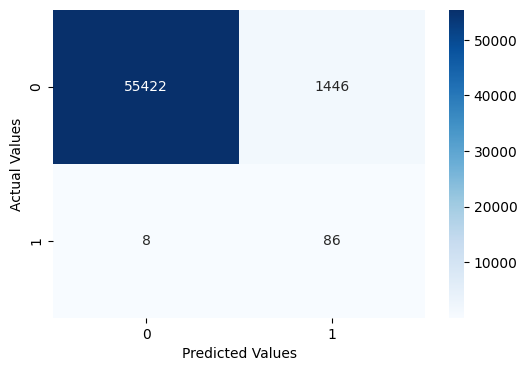

In [40]:
nn_cnf_matrix = metrics.confusion_matrix(y_test, y_pred_smote)

plt.figure(figsize=(6, 4))  
sns.heatmap(nn_cnf_matrix, annot=True, cmap='Blues' ,fmt='d')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.show()

We can see that using the SMOTE method makes it much better at figuring out when something is actually not there (negative instances) compared to other methods we tried. The SMOTE method gave us only 8 cases where it wrongly thought something was there when it wasn't. This shows that SMOTE helps the model do a better job at telling apart the things we're interested in from the things we're not.

## 4. ADASYN (Adaptive Synthetic Sampling)

In [41]:
from imblearn.over_sampling import ADASYN


In [42]:
adasyn = ADASYN(random_state=42)
x_train_adasyn, y_train_adasyn = adasyn.fit_resample(x_train, y_train)

In [43]:
print(y_train_adasyn.value_counts())


Class
0    227447
1    227429
Name: count, dtype: int64


<Axes: xlabel='Class', ylabel='count'>

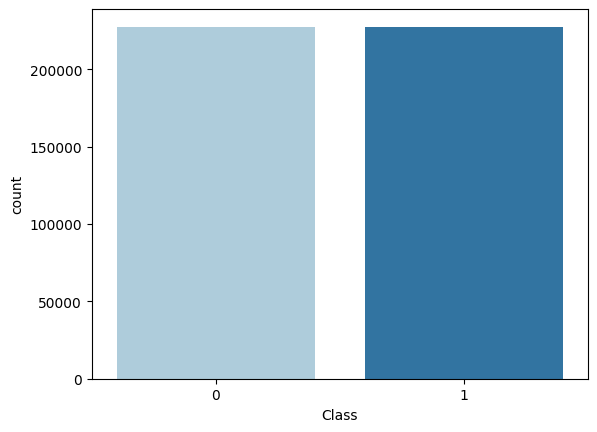

In [44]:
sns.countplot(x=y_train_adasyn,palette='Paired')


In [45]:
lorg = LogisticRegression(max_iter = 10000)

lorg.fit(x_train_adasyn , y_train_adasyn)
y_pred_adasyn = lorg.predict(x_test)

print("accuracy = ",lorg.score(x_test , y_test))
print(classification_report(y_test,y_pred_adasyn))

accuracy =  0.9172430743302552
              precision    recall  f1-score   support

           0       1.00      0.92      0.96     56868
           1       0.02      0.90      0.03        94

    accuracy                           0.92     56962
   macro avg       0.51      0.91      0.50     56962
weighted avg       1.00      0.92      0.96     56962



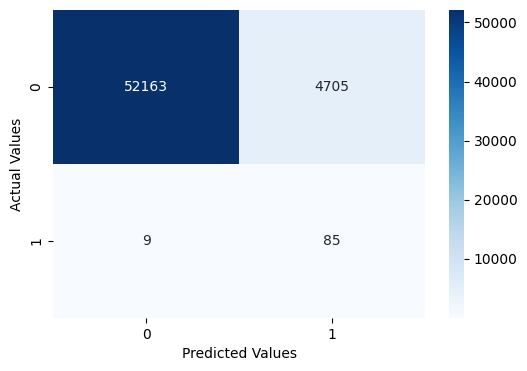

In [46]:
nn_cnf_matrix = metrics.confusion_matrix(y_test, y_pred_adasyn)

plt.figure(figsize=(6, 4))  
sns.heatmap(nn_cnf_matrix, annot=True, cmap='Blues' ,fmt='d')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.show()

# Tackling Imbalanced Datasets With Other Models

In the following section, we explore various classification models and their ability to handle the challenges presented by imbalanced datasets.
Starting with importing our models:

In [47]:
pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.3/200.3 MB 4.3 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [48]:
from sklearn.ensemble import RandomForestClassifier

import xgboost as xgb

from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

## Random Forest Classifier:

In [49]:
# Create and train the Random Forest model
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(x_train, y_train)

# Make predictions on the testing set
y_pred_rf = random_forest_model.predict(x_test)

## Gradient Boosting Classifier (XGBoost):

In [50]:
# Create and train the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(x_train, y_train)

# Make predictions on the testing set
y_pred_xgb = xgb_model.predict(x_test)

## Support Vector Machine (SVM):

In [51]:
# Create and train the SVM model with a pipeline for standardization
svm_model = make_pipeline(StandardScaler(), SVC(random_state=42))
svm_model.fit(x_train, y_train)

# Make predictions on the testing set
y_pred_svm = svm_model.predict(x_test)

## Ploting Confusion Matrices and Classification Reports:

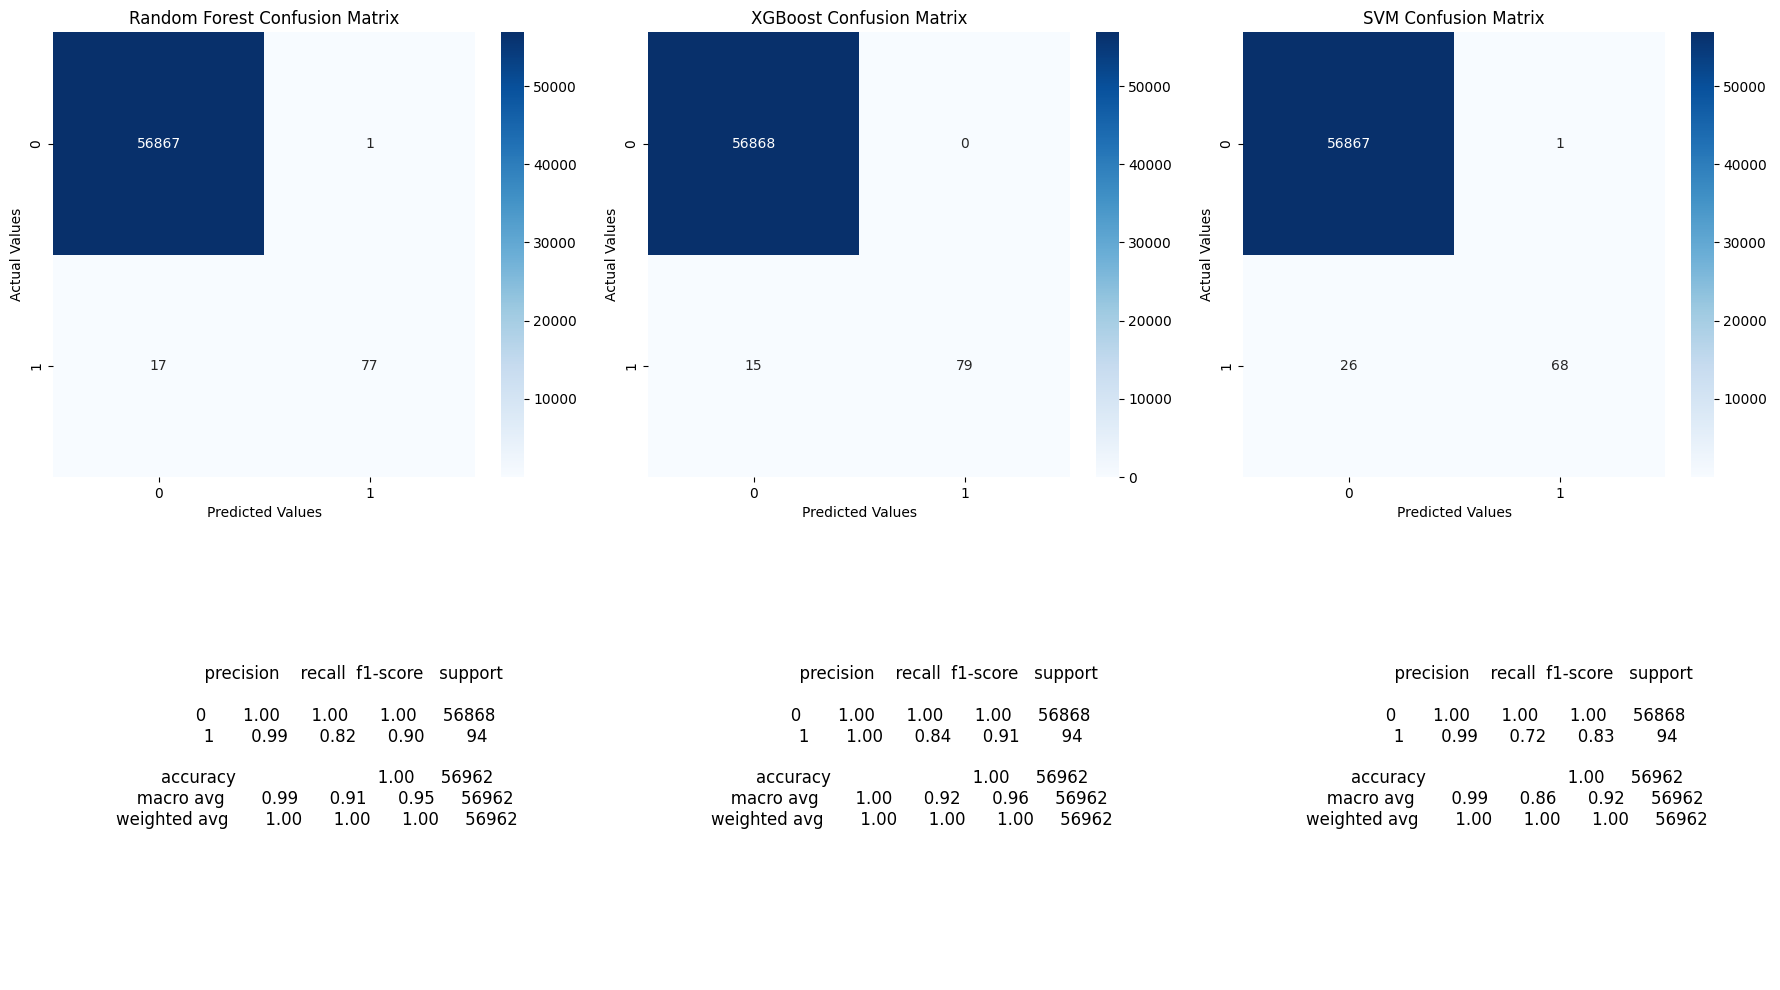

In [52]:
model_names = ['Random Forest', 'XGBoost', 'SVM']
predictions = [y_pred_rf, y_pred_xgb, y_pred_svm]

# Create subplots for each model's confusion matrix
plt.figure(figsize=(18, 10))  

for i, model_name in enumerate(model_names):
    confusion_matrix = metrics.confusion_matrix(y_test, predictions[i])
    
    plt.subplot(2, 3, i + 1)
    sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='d')
    plt.title(f'{model_name} Confusion Matrix')
    plt.ylabel('Actual Values')
    plt.xlabel('Predicted Values')
    
    plt.subplot(2, 3, i + 4)
    classification_rep = metrics.classification_report(y_test, predictions[i])
    plt.text(0.5, 0.5, classification_rep, fontsize=12, ha='center', va='center')
    plt.axis('off')

plt.tight_layout()
plt.show()

## Results Using SMOTE:

In [53]:
#Random Forest model
# Create and train the Random Forest model
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(x_train_smote, y_train_smote)
# Make predictions on the testing set
y_pred_rf = random_forest_model.predict(x_test)

In [54]:
# Create and train the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(x_train_smote, y_train_smote)
# Make predictions on the testing set
y_pred_xgb = xgb_model.predict(x_test)

In [55]:
#SVM model
# Create and train the SVM model with a pipeline for standardization
svm_model = make_pipeline(StandardScaler(), SVC(random_state=42))
svm_model.fit(x_train_smote, y_train_smote)
# Make predictions on the testing set
y_pred_svm = svm_model.predict(x_test)

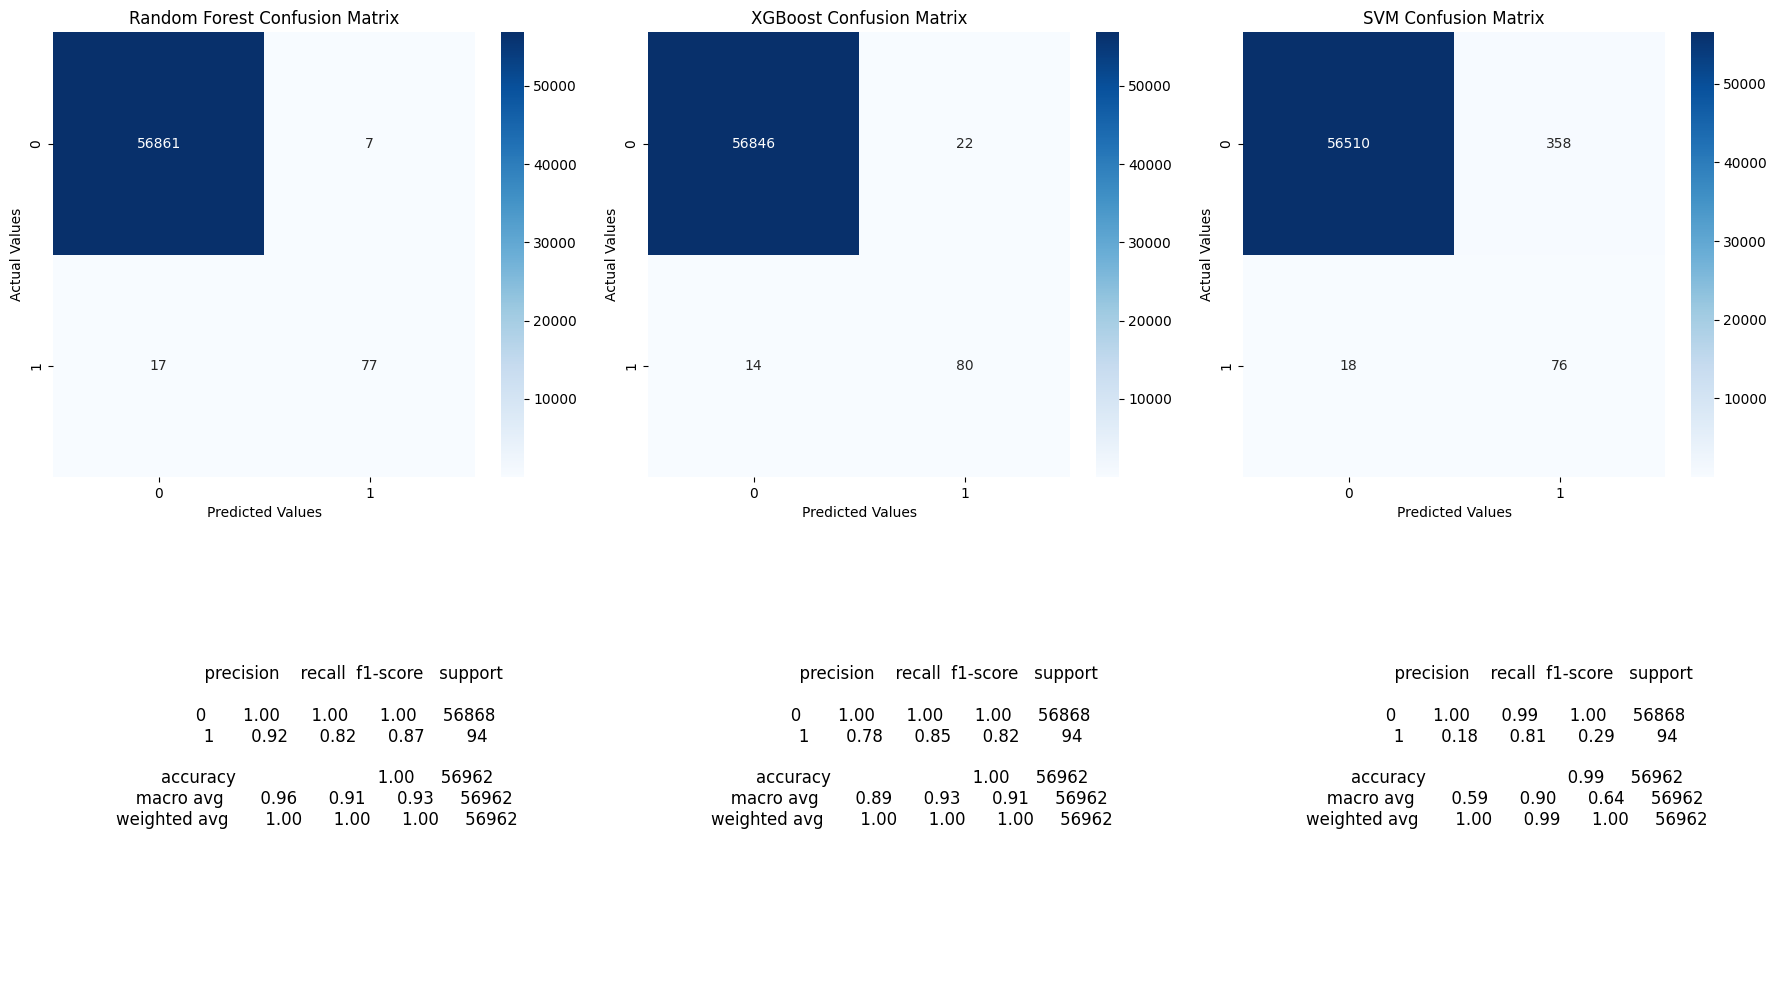

In [56]:
#Ploting Confusion Matrices and Classification Reports:

model_names = ['Random Forest', 'XGBoost', 'SVM']
predictions = [y_pred_rf, y_pred_xgb, y_pred_svm]

# Create subplots for each model's confusion matrix
plt.figure(figsize=(18, 10))  

for i, model_name in enumerate(model_names):
    confusion_matrix = metrics.confusion_matrix(y_test, predictions[i])
    
    plt.subplot(2, 3, i + 1)
    sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='d')
    plt.title(f'{model_name} Confusion Matrix')
    plt.ylabel('Actual Values')
    plt.xlabel('Predicted Values')
    
    plt.subplot(2, 3, i + 4)
    classification_rep = metrics.classification_report(y_test, predictions[i])
    plt.text(0.5, 0.5, classification_rep, fontsize=12, ha='center', va='center')
    plt.axis('off')

plt.tight_layout()
plt.show()

# Conclusion


In our investigation of strategies for dealing with imbalanced datasets in fraud detection, SMOTE has consistently proven to be highly effective in boosting model performance. It excels at improving the detection of fraudulent transactions while simultaneously reducing the rate of false alarms, making it the preferred approach for addressing class imbalance issues. When we compared various models such as Random Forest, XGBoost, SVM, and Logistic Regression, Logistic Regression consistently outperformed the others. It achieved superior metrics, including accuracy, precision, recall, F1-score, and demonstrated a high level of specificity (True Negative Rate), establishing it as the most appropriate choice for effective fraud detection.